In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import math

**The problem we are going to look at in this post is the international airline passengers prediction problem.**

**This is a problem where given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960 or 12 years, with 144 observations.**

In [238]:
df = pd.read_csv("international-airline-passengers.csv")
df.head()

,Month,passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [239]:
df.isnull().sum()

Month         1
passengers    2
dtype: int64

In [240]:
df=df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

**We are not interested in the date, given that each observation is separated by the same interval of one month. Therefore when we load the dataset we can drop the first column.**

In [241]:
#taking copy

air = df.copy()
air.head()

,Month,passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [242]:
#dropping the month feature from data

air.drop(columns="Month", axis = 1, inplace = True)
air.head()

,passengers
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0


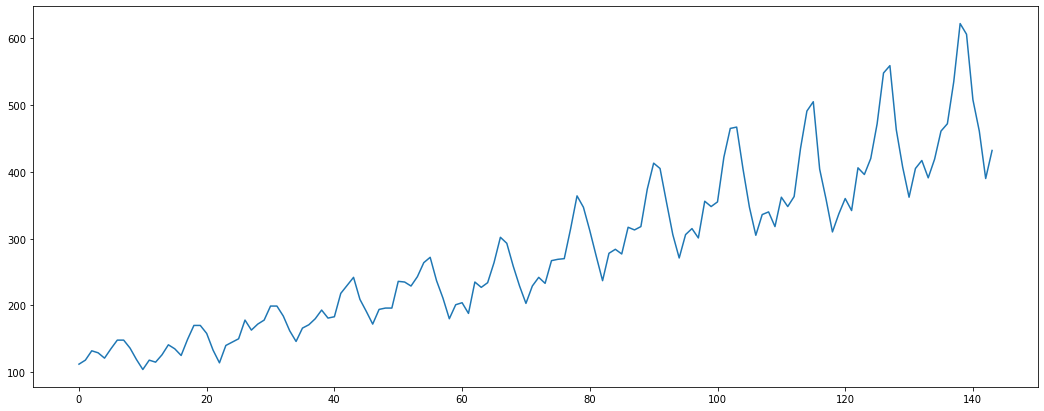

In [243]:
plt.figure(figsize=(18,7))
plt.plot(air)
plt.show()

**You can see an upward trend in the plot.**

**convert the integer values to floating point values which are more suitable for modeling with a neural network.**

In [244]:
air = air.values
air = air.astype('float32')

**With time series data, the sequence of values is important. A simple method that we can use is to split the ordered dataset into train and test datasets. The code below calculates the index of the split point and separates the data into the training datasets with 67% of the observations that we can use to train our model, leaving the remaining 33% for testing the model.**

In [245]:
#splitting data to train and test
training_data = int(len(air)*0.67)
test_data = len(air) - training_data
train, test = air[0:training_data,:], air[training_data:len(air),:]
print("Traing data size {0}  | testing data size {1}".format(len(train), len(test)))

Traing data size 96  | testing data size 48


In [246]:
print(train.shape, test.shape)

(96, 1) (48, 1)


In [247]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [248]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [249]:
print(trainX.shape), print(trainY.shape)

(85, 10)
(85,)


(None, None)

In [250]:
print(testX.shape), print(testY.shape)

(37, 10)
(37,)


(None, None)

In [251]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY,epochs=400, batch_size=2, verbose=2)

Epoch 1/400
43/43 - 0s - loss: 16755.7168
Epoch 2/400
43/43 - 0s - loss: 760.8840
Epoch 3/400
43/43 - 0s - loss: 680.9128
Epoch 4/400
43/43 - 0s - loss: 675.3622
Epoch 5/400
43/43 - 0s - loss: 670.1926
Epoch 6/400
43/43 - 0s - loss: 628.7186
Epoch 7/400
43/43 - 0s - loss: 610.2935
Epoch 8/400
43/43 - 0s - loss: 609.4326
Epoch 9/400
43/43 - 0s - loss: 657.4070
Epoch 10/400
43/43 - 0s - loss: 566.9261
Epoch 11/400
43/43 - 0s - loss: 592.1190
Epoch 12/400
43/43 - 0s - loss: 569.5275
Epoch 13/400
43/43 - 0s - loss: 603.5087
Epoch 14/400
43/43 - 0s - loss: 550.1988
Epoch 15/400
43/43 - 0s - loss: 545.4868
Epoch 16/400
43/43 - 0s - loss: 564.6186
Epoch 17/400
43/43 - 0s - loss: 522.8715
Epoch 18/400
43/43 - 0s - loss: 527.2024
Epoch 19/400
43/43 - 0s - loss: 607.6595
Epoch 20/400
43/43 - 0s - loss: 517.8580
Epoch 21/400
43/43 - 0s - loss: 561.6325
Epoch 22/400
43/43 - 0s - loss: 482.7888
Epoch 23/400
43/43 - 0s - loss: 473.4691
Epoch 24/400
43/43 - 0s - loss: 464.8257
Epoch 25/400
43/43 - 0s

Epoch 199/400
43/43 - 0s - loss: 141.7357
Epoch 200/400
43/43 - 0s - loss: 98.8052
Epoch 201/400
43/43 - 0s - loss: 103.7210
Epoch 202/400
43/43 - 0s - loss: 98.0162
Epoch 203/400
43/43 - 0s - loss: 108.3778
Epoch 204/400
43/43 - 0s - loss: 125.6964
Epoch 205/400
43/43 - 0s - loss: 105.7396
Epoch 206/400
43/43 - 0s - loss: 109.0726
Epoch 207/400
43/43 - 0s - loss: 109.9139
Epoch 208/400
43/43 - 0s - loss: 101.3476
Epoch 209/400
43/43 - 0s - loss: 117.5241
Epoch 210/400
43/43 - 0s - loss: 100.5477
Epoch 211/400
43/43 - 0s - loss: 102.8701
Epoch 212/400
43/43 - 0s - loss: 126.9994
Epoch 213/400
43/43 - 0s - loss: 99.1631
Epoch 214/400
43/43 - 0s - loss: 107.2096
Epoch 215/400
43/43 - 0s - loss: 96.3539
Epoch 216/400
43/43 - 0s - loss: 101.2405
Epoch 217/400
43/43 - 0s - loss: 97.8955
Epoch 218/400
43/43 - 0s - loss: 105.7410
Epoch 219/400
43/43 - 0s - loss: 135.4393
Epoch 220/400
43/43 - 0s - loss: 91.9725
Epoch 221/400
43/43 - 0s - loss: 93.2264
Epoch 222/400
43/43 - 0s - loss: 103.1114

Epoch 397/400
43/43 - 0s - loss: 81.1363
Epoch 398/400
43/43 - 0s - loss: 110.5386
Epoch 399/400
43/43 - 0s - loss: 80.5910
Epoch 400/400
43/43 - 0s - loss: 103.1775


In [252]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 117.79 MSE (10.85 RMSE)
Test Score: 791.23 MSE (28.13 RMSE)


**In first model(timesteps =1) - Taking the square root of the performance estimates, we can see that the model has an average error of 23 passengers (in thousands) on the training dataset and 48 passengers (in thousands) on the test dataset.**

**In second model(timesteps = 5) - Taking the square root of the performance estimates, we can see that the model has an average error of 15 passengers (in thousands) on the training dataset and 34 passengers (in thousands) on the test dataset.**

**In third model(timesteps = 10) - Taking the square root of the performance estimates, we can see that the model has an average error of 12 passengers (in thousands) on the training dataset and 28 passengers (in thousands) on the test dataset.**

**By comparing first and second model second model gave some good results and comapring second model with third model gave better results**

**Here timesteps parameter playing major role by in creasing the timesteps number we are increasing model perfomance, So i can i say that model perfomance is directly proportional to model perfomance**

...
Epoch 195/200
0s - loss: 535.3075
Epoch 196/200
0s - loss: 551.2694
Epoch 197/200
0s - loss: 543.7834
Epoch 198/200
0s - loss: 538.5886
Epoch 199/200
0s - loss: 539.1434
Epoch 200/200
0s - loss: 533.8347
Train Score: 531.71 MSE (23.06 RMSE)
Test Score: 2355.06 MSE (48.53 RMSE)


In [253]:
print(trainY)

[104. 118. 115. 126. 141. 135. 125. 149. 170. 170. 158. 133. 114. 140.
 145. 150. 178. 163. 172. 178. 199. 199. 184. 162. 146. 166. 171. 180.
 193. 181. 183. 218. 230. 242. 209. 191. 172. 194. 196. 196. 236. 235.
 229. 243. 264. 272. 237. 211. 180. 201. 204. 188. 235. 227. 234. 264.
 302. 293. 259. 229. 203. 229. 242. 233. 267. 269. 270. 315. 364. 347.
 312. 274. 237. 278. 284. 277. 317. 313. 318. 374. 413. 405. 355. 306.
 271.]


**Because of how the dataset was prepared, we must shift the predictions so that they aline on the x-axis with the original dataset. Once prepared, the data is plotted, showing the original dataset in blue, the predictions for the train dataset in green the predictions on the unseen test dataset in red.**

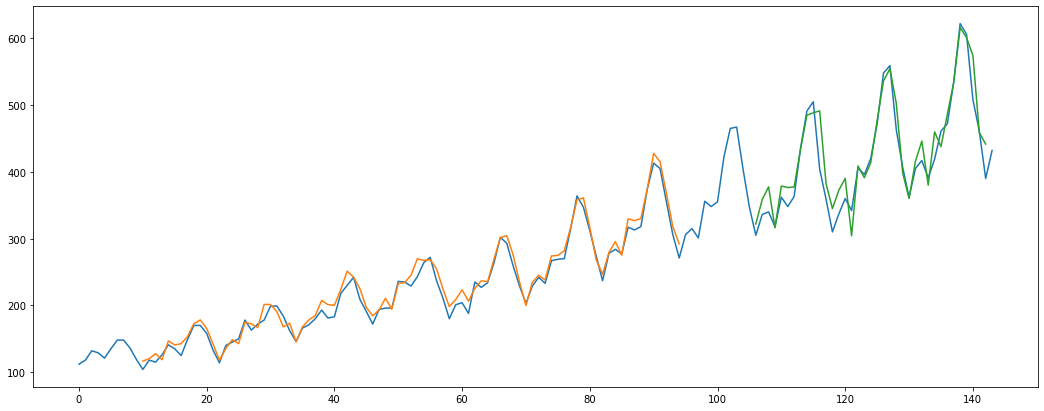

In [254]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(air)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(air)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(air)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(18,7))
plt.plot(air)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

original dataset in blue 

the predictions for the train dataset in green 

the predictions on the unseen test dataset in red.

In [255]:
len(test)

48

In [256]:
x_input=test[38:].reshape(1,-1)
x_input.shape

(1, 10)

In [257]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [258]:
temp_input

[419.0, 461.0, 472.0, 535.0, 622.0, 606.0, 508.0, 461.0, 390.0, 432.0]

### demonstrate prediction for next 6 months

In [268]:

from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<6):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} month input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        #x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} month output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        #x_input = x_input.reshape((1,n_steps, i))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)

0 month input [508.         461.         390.         432.         472.75912476
 429.7298584  509.69049072 517.96630859 535.15045166 605.13116455]
0 month output [[691.6982]]
1 month input [461.         390.         432.         472.75912476 429.7298584
 509.69049072 517.96630859 535.15045166 605.13116455 691.69818115]
1 month output [[699.4482]]
2 month input [390.         432.         472.75912476 429.7298584  509.69049072
 517.96630859 535.15045166 605.13116455 691.69818115 699.44818115]
2 month output [[626.6843]]
3 month input [432.         472.75912476 429.7298584  509.69049072 517.96630859
 535.15045166 605.13116455 691.69818115 699.44818115 626.68432617]
3 month output [[548.2534]]
4 month input [472.75912476 429.7298584  509.69049072 517.96630859 535.15045166
 605.13116455 691.69818115 699.44818115 626.68432617 548.25341797]
4 month output [[477.11057]]
5 month input [429.7298584  509.69049072 517.96630859 535.15045166 605.13116455
 691.69818115 699.44818115 626.68432617 548.2

In [260]:
month_new=np.arange(1,11)
month_pred=np.arange(11,17)

In [261]:
import matplotlib.pyplot as plt

In [262]:
len(air)

144

Text(0.5, 1.0, 'Air passengers prediction for next 6 months')

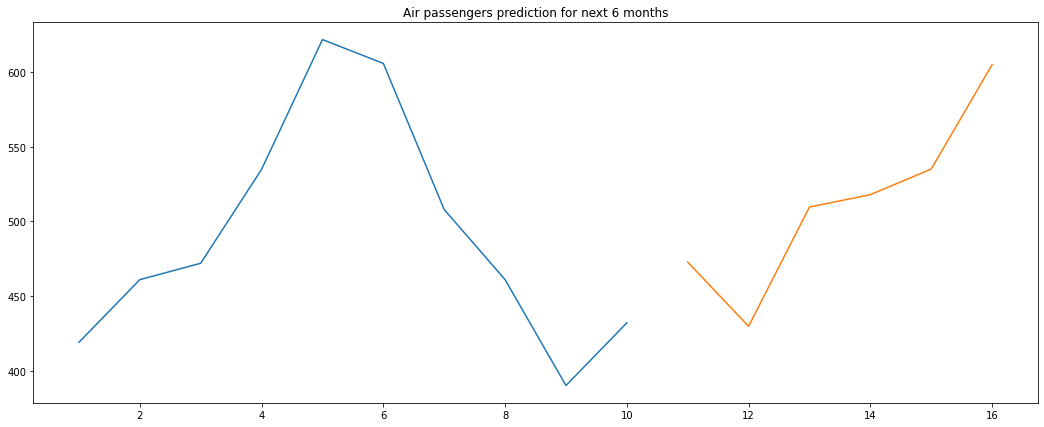

In [263]:
plt.figure(figsize=(18,7))
plt.plot(month_new,(air[134:]))
plt.plot(month_pred,(lst_output))
plt.title("Air passengers prediction for next 6 months")


**Orange curve indicating the passenger count for next 6 months**

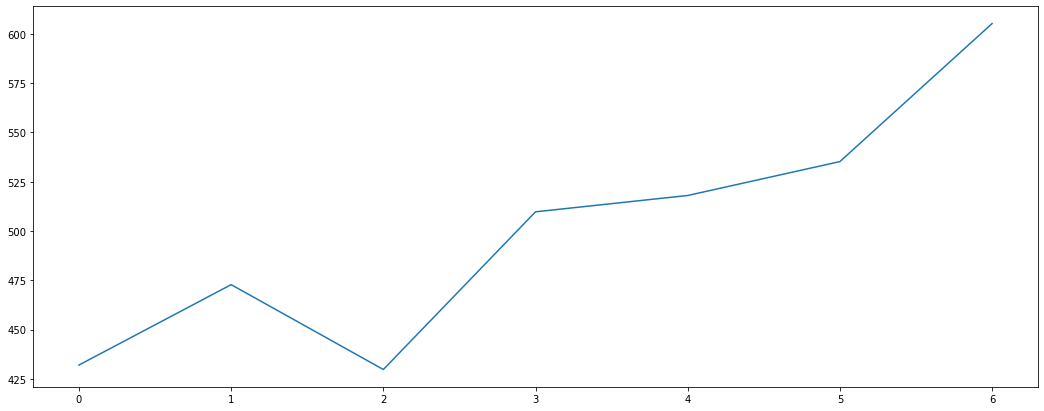

In [266]:
air1 = air.tolist()
air1.extend(lst_output)
plt.figure(figsize=(18,7))
plt.plot(air1[143:])